In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic' # win
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('chipotle.tsv', sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [56]:
df.groupby('item_name')['order_id'].count().head()
index_data = df.groupby('item_name')['order_id'].count().head(10).index
values_data = df.groupby('item_name')['order_id'].count().head(10).values
mean_data = df.groupby('item_name')['order_id'].count().head(10).mean()

In [57]:
type(mean_data)
type(values_data)
# values_data[len(values_data)] = mean_data
values_data = np.append(values_data, mean_data)
index_data = np.append(index_data, 'mean')
values_data

array([ 54. ,  66. ,  91. ,  11. ,  10. ,  25. , 162. ,   2. ,   6. ,
       104. ,  53.1])

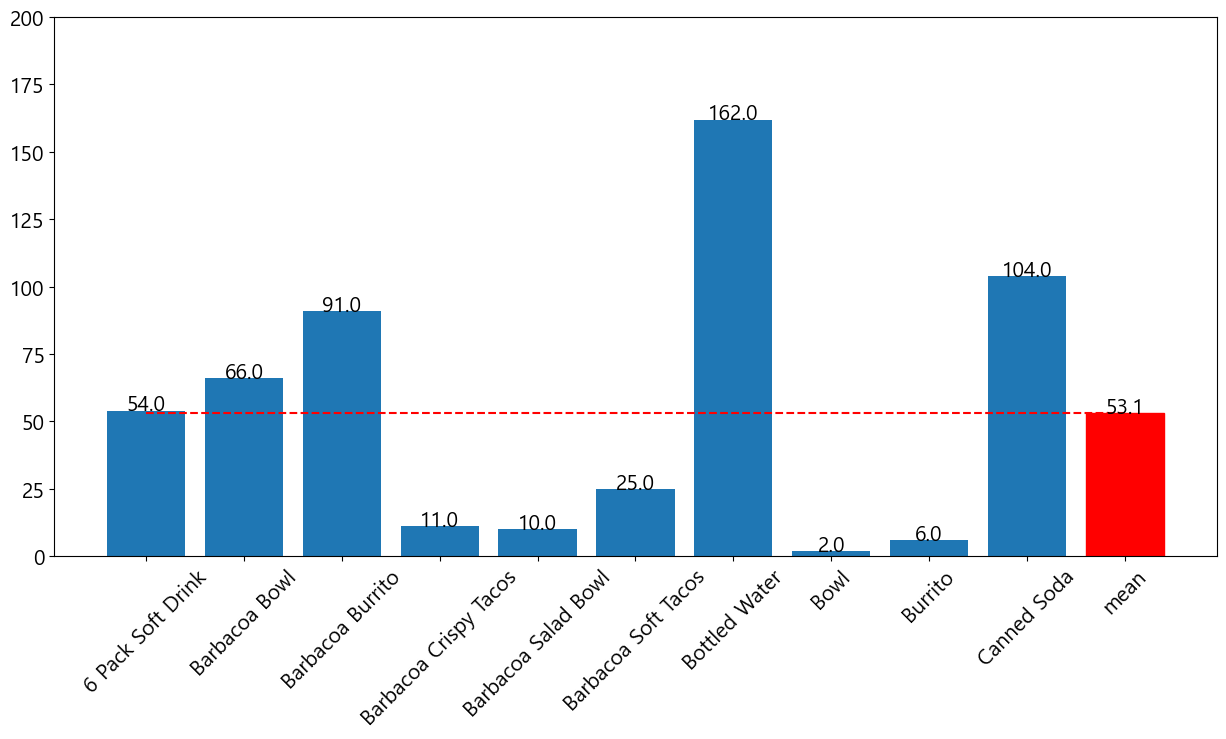

In [62]:
# 메뉴별 주문개수.
# 순서상관없이, head(5)로 5개 막대그래프로 출력하세요.
plt.figure(figsize=(15, 7))
test = plt.bar(index_data, values_data)
test[len(values_data)-1].set_color('red')

plt.plot(index_data, [mean_data]*len(index_data), color='red', ls='--')
plt.xticks(rotation=45)
plt.ylim(0, 200)
for i in range(len(index_data)):
  plt.text(index_data[i], values_data[i], values_data[i], ha='center')
plt.show()